# Deep Neural Networks
Classification problem using Linear Model with multiple Perceptron layers, one input layer (2 nodes), one hidden layer (4 nodes) and one output layer (1 node).
<br>Output layer has binary output (True/False)

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Create Dataset using sklearn
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

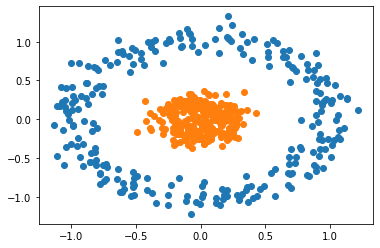

In [3]:
# Plot the Dataset
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [4]:
# Define a class with Linear Model
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Calculate the prediction of hidden layer
        pred = torch.sigmoid(self.linear1(x))
        # Calculate the prediction of output layer using hidden layer prediction
        pred = torch.sigmoid(self.linear2(pred))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [5]:
# Initialize Linear Model
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [6]:
# Define Loss function
criterion = nn.BCELoss()
# Define Adaptive Learning Method Algorithm for optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [7]:
# Train Linear Model for 1000 epochs
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss:', loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

41117852926
epoch: 481 loss: 0.0047734458930790424
epoch: 482 loss: 0.0047585261054337025
epoch: 483 loss: 0.004743683617562056
epoch: 484 loss: 0.004728919360786676
epoch: 485 loss: 0.004714232869446278
epoch: 486 loss: 0.00469962228089571
epoch: 487 loss: 0.004685085266828537
epoch: 488 loss: 0.0046706292778253555
epoch: 489 loss: 0.0046562389470636845
epoch: 490 loss: 0.004641932900995016
epoch: 491 loss: 0.004627698566764593
epoch: 492 loss: 0.004613534081727266
epoch: 493 loss: 0.004599446430802345
epoch: 494 loss: 0.004585424903780222
epoch: 495 loss: 0.004571482539176941
epoch: 496 loss: 0.004557610955089331
epoch: 497 loss: 0.0045438059605658054
epoch: 498 loss: 0.004530076403170824
epoch: 499 loss: 0.004516410641372204
epoch: 500 loss: 0.004502820782363415
epoch: 501 loss: 0.004489293787628412
epoch: 502 loss: 0.004475840833038092
epoch: 503 loss: 0.004462457727640867
epoch: 504 loss: 0.004449137952178717
epoch: 505 loss: 0.004435891285538673
epoch: 506 loss: 0.004422706551849

Text(0, 0.5, 'Loss')

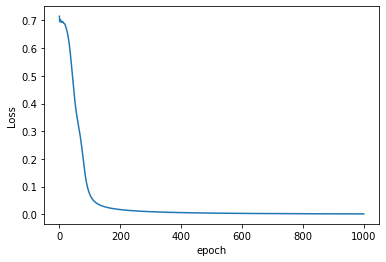

In [8]:
# Plot the Loss change for each epoch
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('Loss')

In [9]:
# Define function to create grid and return contour plot of predictions
def plot_decision_boundary(X, y, pad):
    # Create x_span of 50 x 1 array of horizontal min and max
    x_span = np.linspace(min(X[:, 0]) - pad, max(X[:, 0]) + pad)
    # Create y_span of 50 x 1 array of vertical min and max
    y_span = np.linspace(min(X[:, 1]) - pad, max(X[:, 1]) + pad)
    # Crate mesh grid: xx (50x50) have x_span values as 50 rows and yy(50x50) have y_span values 50 columns
    xx, yy = np.meshgrid(x_span, y_span)
    # flatten the arrays xx, yy and concatinate them to define the Tensor
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    # Predict the probabilities of all the points in the grid
    pred_func = model.forward(grid)
    # Reshape the probabilities to same shape as xx and convert to numpy array
    z = pred_func.view(xx.shape).detach().numpy()
    # Plot Contours
    plt.contourf(xx, yy, z)

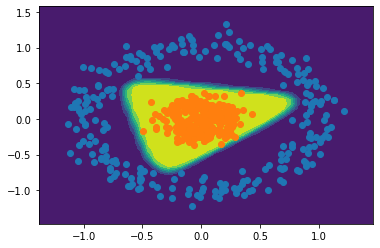

In [10]:
# Plot prediction contour and Input Dataset
plot_decision_boundary(X, y, 0.25)
scatter_plot()

Prediction of point class is  1


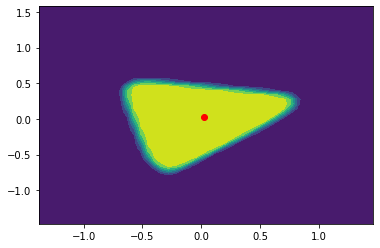

In [11]:
# Predict a class of given point
point = torch.Tensor([0.025, 0.025])
pred_point = model.predict(point)
plt.plot(point[0], point[1], 'ro')
print('Prediction of point class is ', pred_point)
plot_decision_boundary(X, y, 0.25)